In [6]:
# This program processes a USGS Bulk download order, calculates NDVI, and exports to an image and JSON file using scikit image
import matplotlib.pyplot as plt
import numpy as np
import skimage
import json
from skimage.transform import rescale
from skimage import io, exposure
import os

In [7]:
image_type = '.jpg'
image_paths_dictionary_list = []

# Specify the root directory/bulk download order starting point
rootDir = os.getcwd()+'/data/espa-ryezzz@gmail.com-0101803257108'

# Loop through the inner folder and make calculations based on the spectral bands in the innermost folder
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        if fname.endswith('.tif') and "_qa" not in fname and "_sr_atmos_opacity" not in fname:
            # Create a dictionary that I'll add to my array/json
            sat_dictionary = {}
            sat_dictionary['image_name'] = fname.replace('.tif', image_type)
            #  Add Directory Name           
            sat_dictionary['dir_name'] = dirName
            sat_dictionary['image_path']= os.path.join(rootDir, dirName, fname)
            #  Turn each image into vector for mean value
            single_image = io.imread(sat_dictionary['image_path'])
            sat_dictionary['image_mean']= single_image.mean()*1
            # Target band from file name. Remove .tif file extension after the word "band"
            sat_dictionary['band']= fname.split("band", 3)[1].replace(".tif", "")*1
            #  Append dictionary to list                 
            image_paths_dictionary_list.append(sat_dictionary)
            
            
print(image_paths_dictionary_list)

data=image_paths_dictionary_list

with open("output/sat_data.json", 'w') as f:
    json.dump(data, f)


[{'image_name': 'LE07_L1TP_167070_20010811_20170204_01_T1_sr_band4.jpg', 'dir_name': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543', 'image_path': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543/LE07_L1TP_167070_20010811_20170204_01_T1_sr_band4.tif', 'image_mean': -2001.2003514882242, 'band': '4'}, {'image_name': 'LE07_L1TP_167070_20010811_20170204_01_T1_sr_band5.jpg', 'dir_name': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543', 'image_path': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_gith

In [8]:
def color_image_show(img, title):
    """
    Show image
    Input:
    img - 3D array of uint16 type
    title - string
    """
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [12]:
from itertools import groupby
from operator import itemgetter

sat_data=image_paths_dictionary_list

#data sorted by directory name
biggerContainer = []

def re_sort(data):
    sortedList = sorted(data, key=itemgetter('dir_name'))

    for key, value in groupby(data, key=itemgetter('dir_name')):
        bigContainer = []
        for i in value:
            container = {}
            container['dir_name'] = i.get('dir_name')
            container['image_name'] = i.get('image_name')
            container['path'] = i.get('image_path')
            container['band'] = i.get('band')
            container['image_mean'] = i.get('image_mean')
            bigContainer.append(container)
            
        biggerContainer.append(bigContainer)

re_sort(sat_data)
print(biggerContainer)

[[{'dir_name': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543', 'image_name': 'LE07_L1TP_167070_20010811_20170204_01_T1_sr_band4.jpg', 'path': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543/LE07_L1TP_167070_20010811_20170204_01_T1_sr_band4.tif', 'band': '4', 'image_mean': -2001.2003514882242}, {'dir_name': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543', 'image_name': 'LE07_L1TP_167070_20010811_20170204_01_T1_sr_band5.jpg', 'path': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/d

In [13]:
# Calculate vegitation index
def ndvi(data, composite_image):
    vegObj = {}
    for datas in data:
        vegObj['dir_name'] = datas['dir_name'];
        if datas['band'] == '4':
            vegObj['band_4'] = datas['image_mean']
        elif datas['band'] == '3':
            vegObj['band_3'] = datas['image_mean']
        elif datas['band'] == '2':
            vegObj['band_2'] = datas['image_mean']
        elif datas['band'] == '1':
            vegObj['band_1'] = datas['image_mean']
    
    vegObj['image_mean'] = vegObj['band_1']+vegObj['band_2']+vegObj['band_3']/3  
    vegObj['nvdi'] = (vegObj['band_4'] - vegObj['band_3'])/(vegObj['band_4'] + vegObj['band_3'])
    vegObj['composite_image'] = composite_image
    return vegObj


LE07_L1TP_167070_20010811_20170204_01_T1_sr_band4.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


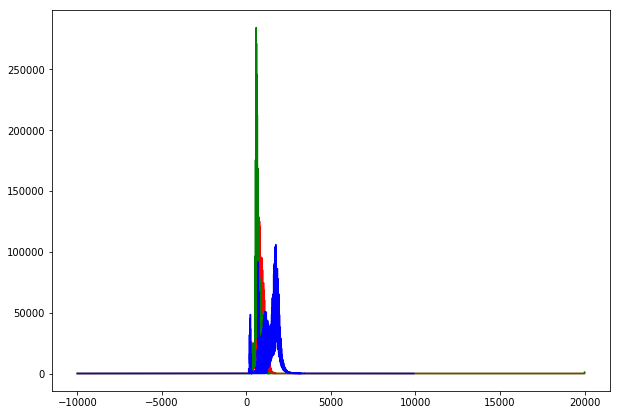

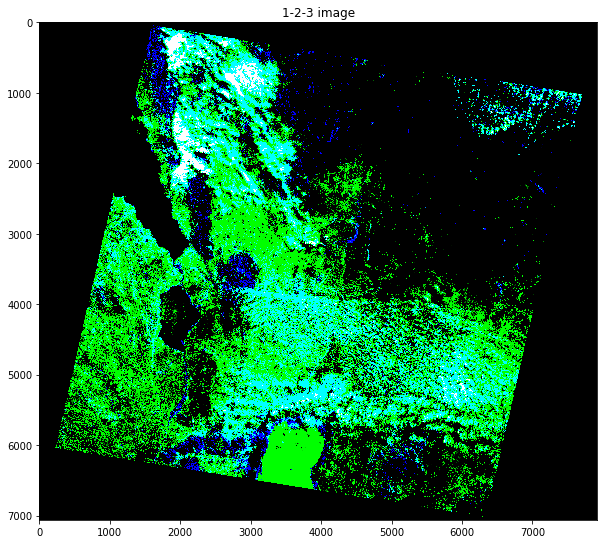

/Users/ryezzz/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/ryezzz/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


LE07_L1TP_167070_20010827_20170203_01_T1_sr_band5.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


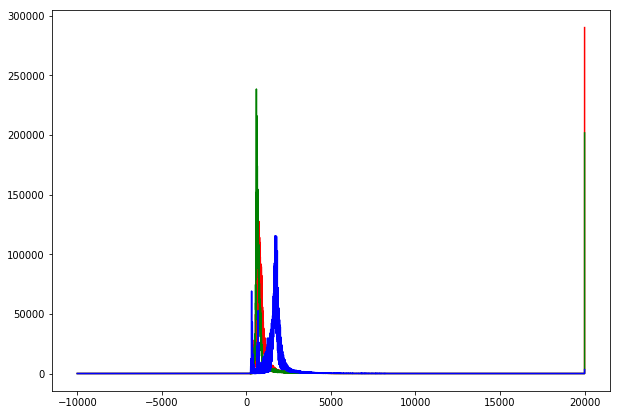

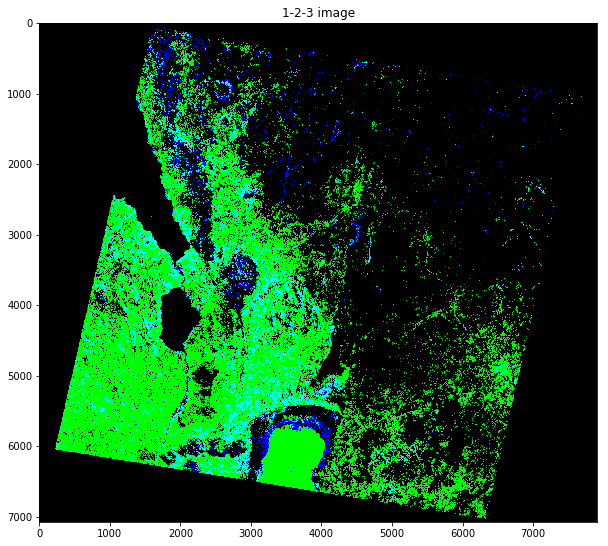

/Users/ryezzz/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: output/LE07_L1TP_167070_20010827_20170203_01_T1_sr_band5.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


[{'dir_name': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001081101T1-SC20180325200543', 'band_4': -2001.2003514882242, 'band_2': -2575.7676423217727, 'band_3': -2477.9981125217528, 'band_1': -2584.0722932579101, 'image_mean': -5985.8393064202673, 'nvdi': -0.10644711656885997, 'composite_image': 'LE07_L1TP_167070_20010811_20170204_01_T1_sr_band4.jpg'}, {'dir_name': '/Users/ryezzz/Google Drive/parsons classes/Thesis/clean_github_upload/data_processing_python/USGS_bulk_downloader_raw_processing/data/espa-ryezzz@gmail.com-0101803257108/LE071670702001082701T1-SC20180325200348', 'band_4': -2157.7417073348583, 'band_3': -2664.1262498127189, 'band_2': -2752.7659518285745, 'band_1': -2848.684817452167, 'image_mean': -6489.492852551648, 'nvdi': -0.10501833459110674, 'composite_image': 'LE07_L1TP_167070_20010827_20170203_01_T1_sr_band5.jpg'}]


In [15]:
from skimage.transform import rescale

# This portion built from: http://nbviewer.jupyter.org/github/HyperionAnalytics/PyDataNYC2014/blob/master/color_image_processing.ipynb

def bands(data, n):
    for datas in data:
        if n == datas['band']:
            img = io.imread(datas['path'])
            return img
        
dataIncludingNDVI = []

   
for biggerContainers in biggerContainer:
    image_name = biggerContainers[0]['image_name']
    print(image_name)
    b1 = bands(biggerContainers, '3')
    b2 = bands(biggerContainers, '2')
    b3 = bands(biggerContainers, '4')
    img123 = np.dstack((b1, b2, b3))
    img123_ha = np.empty(img123.shape, dtype='uint16')
    lims = [(4000, 3000), (700, 3000), (2000, 3000)]

    for lim, channel in zip(lims, range(3)):
        img123_ha[:, :, channel] = exposure.rescale_intensity(img123[:, :, channel], lim)

    color_image_show(img123_ha,'1-2-3 image')
    rescaled_single_image = rescale(img123_ha, 0.3)
    composite_image_name =  image_name
    #   Add NDVI to overall dataset
    dataIncludingNDVI.append(ndvi(biggerContainers, composite_image_name))
    
    io.imsave("output/" + composite_image_name, rescaled_single_image)
    fig = plt.figure(figsize=(10, 7))
    fig.set_facecolor('white')

    for color, channel in zip('rgb', np.rollaxis(img123, axis=-1)):
        counts, centers = exposure.histogram(channel)
        plt.plot(centers[1::], counts[1::], color=color)
        
print(dataIncludingNDVI)